In [38]:
import pandas as pd
from matplotlib.colors import ListedColormap
from sklearn.neighbors import NearestNeighbors
import gensim
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
#from sklearn.model_selection import cross_validation
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
alexa=pd.read_csv('amazon_alexa.csv',delimiter='\t',engine='python',encoding='utf-8')

list_rating=[]


def cleaning (x):
    #print(x)
    if(x<3):
        return 'negative'
    return 'positive'

df1=alexa['rating'] 
final_frame = df1.map(cleaning)           
alexa['rating']=final_frame        
alexa['rating'].value_counts()
alexa['variation'].value_counts()
#to check whether any data value is null
alexa['variation'].isna
#to check whether any data value is null
alexa['rating'].isnull()
z=alexa['verified_reviews']
# to convert categorical values in our dataset to dummy indicators
#pd.get_dummies(alexa['variation'],prefix="hello", prefix_sep ='*',dtype=None)
#vector = TfidfVectorizer(ngram_range=(1,2))
#x=vector.fit_transform(alexa['verified_reviews'])
#print(x)
#print(x.toarray())
#vector.get_feature_names()
     
#alexa

for i in alexa['rating'].values:
    list_rating.append(i)
    


    

In [39]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

stop = set(stopwords.words('english'))
sno= nltk.stem.SnowballStemmer('english')


i=0
str1=''
final_string=[]
positive_words=[]
negative_words=[]
s=''




def cleanhtm(sentence):
    clean=re.compile('<.*?>')
    cleantext=re.sub(clean,'',sentence)
    return cleantext


def remove_emoji(sentence):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', sentence)



def cleanpunc(sentence):
    cleaned=re.sub(r'[?|!|@|#|"|\'|%]',r'',sentence)
    return cleaned

for sent in alexa['verified_reviews'].values:
    filtered_sentence=[]
    sent=cleanhtm(sent)
    sent=remove_emoji(sent)
    
    for w in sent.split():
        for cleaned_words in cleanpunc(w).split():
            if((cleaned_words.isalpha())) &(len(cleaned_words)>2):
                if(cleaned_words.lower() not in stop):
                    s=(sno.stem(cleaned_words.lower())).encode('utf-8')
                    filtered_sentence.append(s)
                    if(alexa['rating'].values)[i]=='positive':
                        positive_words.append(s)
                    if(alexa['rating'].values)[i]=='negative':
                        negative_words.append(s)
                else:
                    continue
            else:
                continue
                
    str1=b" ".join(filtered_sentence)
    final_string.append(str1)
    i+=1
    
    
                    
    






alexa['cleanedtext']=final_string
#to get each value from the dataframe we use (dataframe.values)[i]
(alexa['cleanedtext'].values)[1]
alexa['cleanedtext'].size
#to get the dimension of dataframe
alexa

,rating,date,variation,verified_reviews,feedback,cleanedtext
0,negative,31-Jul-18,Charcoal Fabric,Love my Echo😍!,1,b'love echo'
1,positive,31-Jul-18,Charcoal Fabric,Loved it!,1,b'love'
2,positive,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,b'sometim play answer question correct alexa s...
3,positive,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,b'lot fun old learn control light play game li...
4,positive,31-Jul-18,Charcoal Fabric,Music,1,b'music'
...,...,...,...,...,...,...
3145,positive,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,b'perfect adult everyon'
3146,positive,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,b'listen search check look mani task simpl set'
3147,positive,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,b'love run entir front door dead love listen t...
3148,positive,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,b'complaint sound qualiti isnt most use comman...


In [41]:
# bag of words

bag_words=CountVectorizer()
final_words=bag_words.fit_transform(alexa['cleanedtext'])
print(final_words.toarray().sum(axis=1)) #axis=1 means it is getting values column wise. By default it will be axis =0 i.e is row wise
bag_words.get_feature_names()
final_words.get_shape()


[ 2  1 15 ... 31 31  1]


(3150, 2385)

tfidf=TfidfVectorizer(ngram_range=(1,1),smooth_idf=False)
final_tfidf= tfidf.fit_transform(alexa['cleanedtext'])
tfidf.get_feature_names()
final_tfidf.get_shape()


In [42]:
#word2vec
#!pip3 install gensim
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle
i=0
list_sentences=[]
for sent in alexa['verified_reviews'].values:
    filtered_sentence=[]
    sent=cleanhtm(sent)
    
    for w in sent.split():
        for cleaned_words in cleanpunc(w).split():
            if(cleaned_words.isalpha()):
                filtered_sentence.append(cleaned_words.lower())
            else:
                continue
    
    list_sentences.append(filtered_sentence)
#print(list_sentences)
w2vec_model = gensim.models.Word2Vec(list_sentences,min_count=5,size=100,workers=4)
words=list(w2vec_model.wv.vocab)
#print(len(words))
w2vec_model.wv.most_similar('internet')
#words
len(list_sentences)
#np.shape(list_sentences)

3150

In [43]:
#tfidf 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
corpus=['please call the number below',
       'please do not call us']
vectorizer=TfidfVectorizer(ngram_range=(1,1))
f=vectorizer.fit_transform(corpus)
print(f)
#features=(vectorizer.get_feature_names())
#print(features)
#features[2]
k=(f.toarray())
print(k)

  (0, 0)	0.4992213265230509
  (0, 4)	0.4992213265230509
  (0, 6)	0.4992213265230509
  (0, 1)	0.35520008546852583
  (0, 5)	0.35520008546852583
  (1, 7)	0.4992213265230509
  (1, 3)	0.4992213265230509
  (1, 2)	0.4992213265230509
  (1, 1)	0.35520008546852583
  (1, 5)	0.35520008546852583
[[0.49922133 0.35520009 0.         0.         0.49922133 0.35520009
  0.49922133 0.        ]
 [0.         0.35520009 0.49922133 0.49922133 0.         0.35520009
  0.         0.49922133]]


In [44]:
from sklearn.metrics import accuracy_score
vector=TfidfVectorizer(ngram_range=(1,1))
final_vec=vector.fit_transform(alexa['cleanedtext'])
Y_origin=alexa['rating']
Y_train=Y_origin[0:3000:1]
Y_test=Y_origin[3001:3150:1]
Y_act=Y_test[0:10:1]
print(Y_act)
#print(final_vec.toarray())
list_final=final_vec.toarray()
list_train =list_final[0:3000:1]
#print(list_train)
list_test=list_final[3001:3150:1]
len(list_test)
neigh=KNeighborsClassifier(n_neighbors=1)
print(neigh.fit(list_train,Y_train))
X=list_test[0:10:1,::]
print(X)
#Y=list_final[1:2:1,::]
#print(X)
#print(Y)

print(neigh.kneighbors(X))
Y_pred=neigh.predict(X)
#print(Y_pred)
#print(neigh.predict_proba(X))
print(accuracy_score(Y_act,Y_pred))


3001    positive
3002    positive
3003    positive
3004    positive
3005    positive
3006    positive
3007    positive
3008    positive
3009    positive
3010    negative
Name: rating, dtype: object
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]]), array([[2650],
       [2651],
       [2652],
       [   1],
       [  65],
       [2655],
       [2656],
       [2657],
       [2658],
       [2659]], dtype=int64))
1.0


In [46]:

P=[[0], [1], [2], [3]]
Q=[0, 0, 1, 1]
neigh1 = KNeighborsClassifier(n_neighbors=3)
neigh1.fit(P, Q)
#print(neigh1.kneighbors([[2.1],[2]]))

#doing the same as above for another set

M=[[0., 0., 0.], [0., .5, 0.], [1., 1., .5]]
neigh2=NearestNeighbors(n_neighbors=1)
neigh2.fit(M)
#print(neigh2.kneighbors([[0,0,0]]))

#uunderstanfding knn graph

B= [[0], [3], [1]]
neigh3 = NearestNeighbors(n_neighbors=2)
neigh3.fit(B)
NearestNeighbors(n_neighbors=2)
A = neigh3.kneighbors_graph(B,mode='distance')
A.toarray()

array([[0., 0., 1.],
       [0., 0., 2.],
       [1., 0., 0.]])

data=pd.read('overlap.csv')


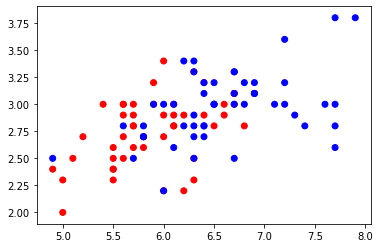

In [47]:
#List=final_vec.extend(list_rating)
#print(List)
data=np.genfromtxt('overlap.csv',delimiter=',')
#print(data)
X1=data[:,:2]
Y1=data[:,2]
#print(X1)
#Y1
h=.02
light=ListedColormap(['#FFAAAA','#AAFFFF'])
bold=ListedColormap(['#FF0000','#0000FF'])
nei=KNeighborsClassifier(n_neighbors=10)
nei.fit(X1,Y1)
plt.figure()
plt.scatter(X1[:,0],X1[:,1],c=Y1,cmap=bold)

 from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
X_tr,X_cv=train_test_split(list_train,test_size=0.3)
Y_tr,Y_cv=train_test_split(Y_train,test_size=0.3)
for i in range(1,1,2):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_tr,Y_tr)
    pred =knn.predict(X_cv)
    acc=accuracy_score(Y_cv,pred,normalize=True)*float(100)
    print(acc)
    
    
    

In [97]:
 from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
X_tr,X_cv=train_test_split(list_train,test_size=0.3)
Y_tr,Y_cv=train_test_split(Y_train,test_size=0.3)
X_dup1=X_cv[:,0]
X_dup2 =X_cv[:,1]
ve=TfidfVectorizer()
Y_cv1   =  ve.fit_transform(Y_cv)
Y3 =Y_cv1.toarray()
Y4=Y3[:,0]
#print(Y3)
for i in range(1,2,2):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_tr,Y_tr)
    pred =knn.predict(X_cv)
    acc=accuracy_score(Y_cv,pred,normalize=True)*float(100)
    print("accuaracy for k=%d is %d" % (i,acc))
    #plt.scatter(X_cv,X_cv,c=Y4,cmap=bold)
    
knn=KNeighborsClassifier(5)
knn.fit(X_tr,Y_tr)
pred=knn.predict(list_test)
acc=accuracy_score(Y_test,pred,normalize=True)*float(100)
print(acc)

accuaracy for k=1 is 87
93.95973154362416
